# STAT 207 Lab 9 - Individual Part - [25 total points]

## Multiple Linear Regression, ANOVA, and Logistic Regression

Due: Tuesday, October 26 11:59pm CST

## <u>Dataset</u>: Seattle Airbnb Dataset

The following dataset is a **random sample** of available Airbnb listings in Seattle, WA. These listings were collected in January 2016, and filtered to just contain listings from the five most popular Seattle neighborhoods (for Airbnb listings) and just contain listings that are either in a house or apartment property. Rows with missing values have already been dropped from the dataset.

Suppose that you work as a data scientist at Airbnb. You'd like to learn more about the relationship between various variables in this dataset. We will work on several different case studies with this dataset in this assignment.

This dataset contains the following variables.

**Listing Information**
The dataset contains the following information about the Airbnb *listing*:
* <u>price</u>: price of the listing (per night)(in US dollars)
* <u>review_scores_rating</u>: the average rating of the listing [0,100] (100 is the best)
* <u>number_of_reviews</u>: the number of reviews for the listing
* <u>security_deposit</u>: the security deposit required for the listing (in US dollars)
* <u>cleaning_fee</u>: the cleaning fee required for the listing (in US dollars)
* <u>neighborhood</u>: the neighborhood of Seattle the listing is located in
* <u>property_type</u>: is the listing in a 'House' or 'Apartment'
* <u>room_type</u>: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'
* <u>accommodates</u>: how many guests will the listing accommodate
* <u>bathrooms</u>:how many bathrooms does the listing have
* <u>beds</u>: how many beds does the listing have

**Host Information**
The dataset also contains the following information about the *host* of the given Airbnb listing:
* <u>host_is_superhost</u>: is the host a "superhost": t=True, f=False
* <u>host_has_profile_pic</u>: does the host have a profile pic in their bio: t=True, f=False
* <u>host_response_time</u>: how fast will the host respond to requests (on average)
* <u>host_acceptance_rate</u>: what percent of booking requests will the host accept



<p>&nbsp;</p>
<table style="border: none;border-collapse: collapse;width:102pt;">
    <tbody>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;width:51pt;">Problem</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;border-left:none;width:51pt;">Points</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">2.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">2.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.4.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.4.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.5.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.5.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
    </tbody>
</table>





### Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Data Processing and Cleaning

First, read the seattle_airbnb_listings_cleaned.csv file into a dataframe. This csv file does not contain any missing values.

In [41]:
df = pd.read_csv("seattle_airbnb_listings_cleaned.csv")

In [42]:
df

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.00,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.00,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.00,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.00,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.00,1,t,t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,250,95,4,250,100,Fremont,House,Entire home/apt,16,3.5,10,within a few hours,0.97,1,f,t,t
335,125,95,12,150,45,Fremont,Apartment,Entire home/apt,2,1.0,1,within a few hours,1.00,1,t,t,t
336,100,98,10,200,89,Fremont,Apartment,Entire home/apt,6,1.0,2,within an hour,1.00,1,f,t,t
337,175,96,29,500,95,Fremont,House,Entire home/apt,6,2.0,3,within a few hours,1.00,1,f,t,t


<hr>

## <u>Case Study A</u>: Association between the Airbnb Price and the Neighborhood the Listing is Located In

## 2. Associations in the Dataset

First,  we would like to examine whether there is a relationship between the five different neighborhoods **in this dataset** and the price of the Airbnb listings.

### 2.1. Average Price by Neighborhood

First, calculate the average price of an Airbnb listing in each of the five neighborhoods. For full credit, you should calculate these five averages in just one line of code.


In [43]:
df.groupby('neighborhood')["price"].mean()

neighborhood
Belltown       153.859649
Broadway       115.175000
Fremont        160.382979
Minor          140.326531
Wallingford    123.833333
Name: price, dtype: float64

#### 2.2. Airbnb Price Distribution by Neighborhood

Next, plot a side-by-side boxplots plot, visualizing the relationship between the listing price and the 5 neighborhoods in this dataset.

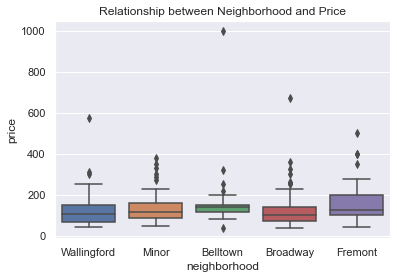

In [44]:
sns.boxplot(x="neighborhood", y='price', data=df)
plt.title('Relationship between Neighborhood and Price')
plt.show()

## 3. Associations in the Population of *All Seattle Airbnb Properties from the Top 5 Neighborhoods* - with ANOVA

Next, we would like to determine if an association for ALL Seattble Airbnb listings between the price and the top 5 most popular Seattle neighborhoods. Specifically, we would like to test this association by assessing if we have enough evidence to suggest that at least two neighbhorood average Airbnb prices are different from each other. The averages that you are considering in this case will be:
* $\mu_{Wallingford}$ = the average listing price of *all* Airbnb properties in Wallingford
* $\mu_{Minor}$ = the average listing price of *all* Airbnb properties in Minor
* $\mu_{Belltown}$ = the average listing price of *all* Airbnb properties in Belltown
* $\mu_{Broadway}$ = the average listing price of *all* Airbnb properties in Broadway
* $\mu_{Fremont}$ = the average listing price of *all* Airbnb properties in Fremont


### 3.1. Hypotheses

First, set up the hypotheses for this test. Make sure that you use the correct notation.

$H_0$: $\beta_Wallingford$ = $\beta_Minor$ = $\beta_Belltown$ = $\beta_Broadway$ = $\beta_Fremont$ = 0 </br>
$H_A$: at least two neighborhood average Airbnb prices are different from each other

### 3.2. Test Statistic and p-value

Next, find the test statistic and the p-value that correspond to this hypothesis test.

In [45]:
model = smf.ols('price ~ neighborhood', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.180
Date:                Sat, 23 Oct 2021   Prob (F-statistic):             0.0139
Time:                        15:36:16   Log-Likelihood:                -2009.3
No. Observations:                 339   AIC:                             4029.
Df Residuals:                     334   BIC:                             4048.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     153.8596     12.110     12.706      0.000     130.039     177.680
neighborhood[T.Broadway]      -38.6846     14.707     -2.630      0.009     -67.615      -9.754
neighborhood[T.Fremont]         6.5233     18.014      0.362      0.717     -28.911      41.958
neighborhood[T.Minor]         -13.5331     17.811     -0.760      0.448     -48.569      21.503
neighborhood[T.Wallingford]   -30.0263     16.532     -1.816      0.070     -62.545       2.493
==============================================================================
Omnibus:                      329.050   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11341.496
Skew:                           4.038   Prob(JB):                         0.00
Kurtosis:                      30.161   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test statistic is 3.180 and the p-value is 0.0139.

### 3.3. Make a conclusion

Use a significance level of $\alpha=0.05$ to make a conclusion about our hypotheses from 3.1.

Because $p-value= 0.0139 \leq \alpha_0 = 0.05$ we reject the null hypothesis. Thus there is sufficient evidence to suggest that at least two neighborhood Airbnb prices are different from each other. 

### 3.4. Type 1 Error Probability

In our hypothesis test conducted in 3.1-3.3, what is the probability that the null value is actually true, but we incorrectly reject it?

The probability that the null value is actually true but we incorrectly reject it is 5%.

<hr>

## <u>Case Study B</u>: Association between Airbnb Price and Multiple Explanatory Variables - Multiple Linear Regression

Next, we would like to build a multiple linear regression model that predicts the **price** of a Seattle Airbnb listing using several explanatory variables.





## 4. Descriptive Analytics

### 4.1. Interaction between Accommodation Number, Price, and Property Type
First, let's analyze the relationship between the number of people that the Airbnb property accommodates and the price of the listing. Plot a scatterplot for these two numerical variables below (you should put price on the y-axis). Also in this scatterplot, color-code your points by the property type that this property corresponds to. Finally, fit a best fit line for each of the two different property types in this scatterplot.

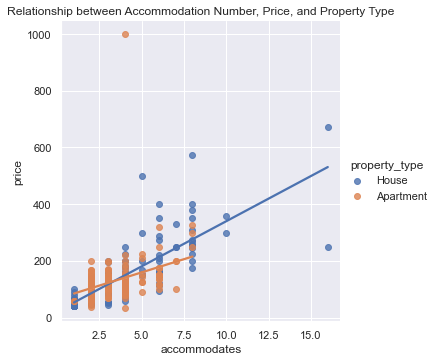

In [46]:
sns.lmplot(x="accommodates",y='price', hue='property_type', data=df, ci=False)
plt.title('Relationship between Accommodation Number, Price, and Property Type')
plt.show()

### 4.2. Interpretation

Does this plot above indicate that there may be an interaction between the property type and the number of people that can be acommodated in an Airbnb listing in a regression model that predicts price? Explain.

There does seem to be an interaction between property type and the number of people that can be acommodated in an Airbnb listing in this regression model that predicts price. There is a positive correlation between acommodation number and price for both house and apartment. However, house prices seem to increase at a greater rate per person compared to an apartment.

## 5. Linear Regression Model

Next, let's build a multiple linear regression model that predicts the **price** of a Seattle Airbnb listing using the following explanatory variables.
* accommodates,
* beds,
* bathrooms,
* property_type,
* room_type, and
* an interaction term between property type and accommodates.


### 5.1. Model Fitting
Fit this model below display the summary output table for the fitted model.

In [62]:
model = smf.ols(formula='price ~ accommodates + beds + bathrooms + property_type + room_type + accommodates*property_type', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     43.29
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           3.32e-43
Time:                        15:47:30   Log-Likelihood:                -1905.4
No. Observations:                 339   AIC:                             3827.
Df Residuals:                     331   BIC:                             3857.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              48.5121     13.833      3.507      0.001      21.300      75.724
property_type[T.House]                -13.5063     17.834     -0.757      0.449     -48.588      21.576
room_type[T.Private room]             -48.0473     12.803     -3.753      0.000     -73.233     -22.862
room_type[T.Shared room]              -34.8066     17.792     -1.956      0.051     -69.806       0.193
accommodates                           16.9275      4.301      3.936      0.000       8.466      25.389
accommodates:property_type[T.House]     7.1134      4.227      1.683      0.093      -1.201      15.428
beds                                   -6.9700      6.114     -1.140      0.255     -18.998       5.058
bathrooms                              35.7682      8.928      4.006      0.000      18.206      53.330
==============================================================================
Omnibus:                      476.383   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91231.191
Skew:                           6.725   Prob(JB):                         0.00
Kurtosis:                      82.234   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Model Conditions Checking, Fixing, and Transformations

Next, we would like to check the conditions for conducting inference on the population slopes in the corresponding population regression model. 


### 6.1. Initial Model Condition Checking
Check the corresponding conditions for inference below.

1. The linearity condition does not hold. There is one outlier

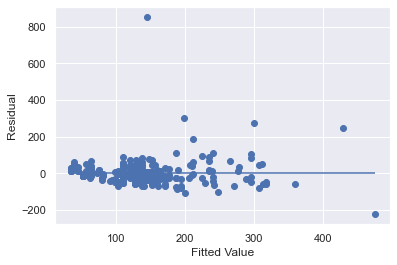

In [48]:
plt.scatter(model.fittedvalues, model.resid)
plt.hlines(y=0, xmin=np.min(model.fittedvalues), xmax=np.max(model.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

2. The constant residuals condition is not met because as the fitted value increases, the variance of the residuals also increases.

3. The residuals are not normal. Our histogram is not normally distributed.

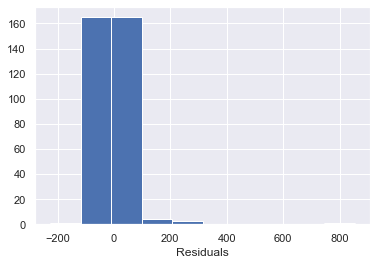

In [49]:
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.show()

4. The residuals are independent. The data is randomly sampled and the sample size n 339 < 10% of all Airbnb's in Seattle.

5. The explanatory variables are not collinear.

### 6.2. Deleting a Numerical Explanatory Variable from the Model

If you had to delete one of the three numerical explanatory variables from the model, which one would you pick? Use the $R^2$ to help make your decision.

*You would still keep the accommodate and property type interaction variable in your model though*.

In [50]:
model.rsquared

0.47797023894981516

In [51]:
new_mod = smf.ols(formula='price ~ beds+accommodates+property_type+bathrooms+ accommodates*property_type', data = df).fit()
new_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     55.72
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           5.57e-42
Time:                        15:36:17   Log-Likelihood:                -1912.6
No. Observations:                 339   AIC:                             3837.
Df Residuals:                     333   BIC:                             3860.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              43.5682     13.987      3.115      0.002      16.055      71.082
property_type[T.House]                -43.1357     15.474     -2.788      0.006     -73.575     -12.696
beds                                   -8.8338      6.146     -1.437      0.152     -20.923       3.256
accommodates                           20.2144      4.279      4.724      0.000      11.796      28.632
accommodates:property_type[T.House]    11.0628      4.093      2.703      0.007       3.012      19.114
bathrooms                              29.6611      8.859      3.348      0.001      12.235      47.087
==============================================================================
Omnibus:                      456.577   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77463.529
Skew:                           6.243   Prob(JB):                         0.00
Kurtosis:                      75.995   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
new_mod.rsquared

0.455526264298316

We should delete room type from the model because it lowers the r_squared value.

### 6.3. Response Variable Transformation and Variable Deletion

In attempt to have our conditions for inference met, let's build a new linear regression model predicts the **ln(price)** of a Seattle Airbnb listing using the following explanatory variables.
* accommodates,
* bathrooms,
* property_type,
* room_type, and
* an interaction term between property type and accommodates.

*Note that we are no longer considering the beds variable as an explanatory variable in our model.*

#### 6.3.1. Model Fitting
Fit this model below and display the summary output table for the fitted model.

In [53]:
df['log_price'] = np.log(df['price'])
df

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,log_price
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.00,1,t,t,t,5.703782
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.00,1,f,t,t,5.003946
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.00,1,f,t,t,4.553877
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.00,1,t,t,t,4.653960
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.00,1,t,t,t,4.941642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,250,95,4,250,100,Fremont,House,Entire home/apt,16,3.5,10,within a few hours,0.97,1,f,t,t,5.521461
335,125,95,12,150,45,Fremont,Apartment,Entire home/apt,2,1.0,1,within a few hours,1.00,1,t,t,t,4.828314
336,100,98,10,200,89,Fremont,Apartment,Entire home/apt,6,1.0,2,within an hour,1.00,1,f,t,t,4.605170
337,175,96,29,500,95,Fremont,House,Entire home/apt,6,2.0,3,within a few hours,1.00,1,f,t,t,5.164786


In [54]:
mod2 = smf.ols(formula='log_price ~ accommodates+bathrooms+property_type+room_type+accommodates*property_type', data = df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           2.33e-74
Time:                        15:36:17   Log-Likelihood:                -86.270
No. Observations:                 339   AIC:                             186.5
Df Residuals:                     332   BIC:                             213.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.3052      0.064     66.815      0.000       4.178       4.432
property_type[T.House]                  0.1089      0.083      1.313      0.190      -0.054       0.272
room_type[T.Private room]              -0.5500      0.060     -9.229      0.000      -0.667      -0.433
room_type[T.Shared room]               -0.7874      0.082     -9.610      0.000      -0.949      -0.626
accommodates                            0.0880      0.016      5.492      0.000       0.056       0.119
accommodates:property_type[T.House]    -0.0047      0.019     -0.242      0.809      -0.043       0.034
bathrooms                               0.1964      0.042      4.720      0.000       0.115       0.278
==============================================================================
Omnibus:                       75.830   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.916
Skew:                           0.853   Prob(JB):                     1.71e-76
Kurtosis:                       7.668   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6.3.2. New Model Condition Checking
Check the corresponding conditions for inference for this new model below.

1. The linearity condition does not hold because there are two outliers.

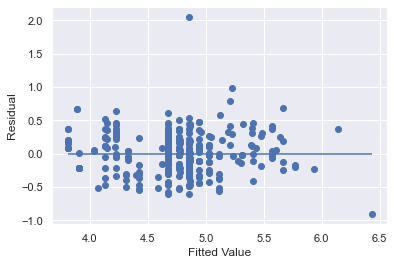

In [55]:
plt.scatter(mod2.fittedvalues, mod2.resid)
plt.hlines(y=0, xmin=np.min(mod2.fittedvalues), xmax=np.max(mod2.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

2. The constant residuals condition is not met because the variance of residuals changes as the fitted values increases.

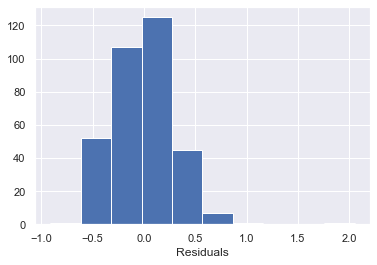

In [56]:
plt.hist(mod2.resid)
plt.xlabel('Residuals')
plt.show()

3. The residuals are not normal.

4. The condition for independence is met because the data is randomly sampled and the sample size is less than 10% of the entire population.

## 7. Transformed Model

Let's use our model from #6 for further evaluation.


### 7.1. Model Predictive Power

Which model was able to explain more of the response variable variability: the original model from #5 or the transformed model from #6? Explain.

The transformed model from #6 better explains the response variable variability because there are less variables which results in a lower r_squared value. The data is also more noramlized for #6 than in #5.


### 7.2. Model Equation

Write out your fitted regression model from #6. Make sure to use the appropriate notation discussed in class.

In [57]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           2.33e-74
Time:                        15:36:18   Log-Likelihood:                -86.270
No. Observations:                 339   AIC:                             186.5
Df Residuals:                     332   BIC:                             213.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.3052      0.064     66.815      0.000       4.178       4.432
property_type[T.House]                  0.1089      0.083      1.313      0.190      -0.054       0.272
room_type[T.Private room]              -0.5500      0.060     -9.229      0.000      -0.667      -0.433
room_type[T.Shared room]               -0.7874      0.082     -9.610      0.000      -0.949      -0.626
accommodates                            0.0880      0.016      5.492      0.000       0.056       0.119
accommodates:property_type[T.House]    -0.0047      0.019     -0.242      0.809      -0.043       0.034
bathrooms                               0.1964      0.042      4.720      0.000       0.115       0.278
==============================================================================
Omnibus:                       75.830   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.916
Skew:                           0.853   Prob(JB):                     1.71e-76
Kurtosis:                       7.668   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
mod2.params

Intercept                              4.305174
property_type[T.House]                 0.108925
room_type[T.Private room]             -0.549950
room_type[T.Shared room]              -0.787354
accommodates                           0.087974
accommodates:property_type[T.House]   -0.004704
bathrooms                              0.196449
dtype: float64

$\hat{ln(price)} = 4.305174 + 0.108925(property_type[T.House]) - 0.549950(room_type[T.Private room]) - 0.787354(room_type[T.Shared room]) + 0.0879749(accomodates) - 0.004704(accommodates:property_type[T.House]) + 0.196449(bathrooms) $

### 7.3. Prediction

Predict the **price** of a Seattle Airbnb listing that is an apartment, where the tenant has to share a room with someone, the listings accommodates just 1 person, and the listing has 1 bathroom?

In [59]:
price_hat = 4.305174 - 0.787354*1 + 0.0879749*1 + 0.196449*1

In [60]:
np.exp(price_hat)

44.801602102587786

### 7.4. Intercept and Slope Interpretation

#### 7.4.1. Intercept

Put the intercept of the regression model from #6 into words. **Make sure to use non-causal langauge in your interpretation!**

<u>Intercept</u>: We would expect a Seattle Airbnb with no rooms, no bathrooms, and can accomodate no people on average, to have a ln(price) of $4.31. (This is a nonsensical answer since then the Airbnb technically doesn't exist).

#### 7.4.2. Slope

Put the slope of the regression model from #6 that corresponds to accommodates into words. **Make sure to use non-causal langauge in your interpretation!**

<u>Slope</u>: If we were to increase the number of private rooms by 1, we would expect the ln(price) to decrease by $0.55. If we were to increase the number of shared rooms by 1, we would expect the ln(price) to decrease by $0.79. If we were to increase the number of people accomodated by 1, we would expect the ln(price) to increase by $0.09. If we were to increase the number of bathrooms by 1, we would expect the ln(price) to increase by $0.20. If we were to increase the number of houses by 1, we would expect the ln(price) to increase by $0.11. If we were to increase the number of houses and people accomodated by 1, we would expect the ln(price) to decrease by $0.005.

## 8. Transformed Model Inference

Finally, (also referring to the transformed model from #6), we would like to determine if we have sufficient evidence to suggest that at least one of the slopes in our corresponding population model is non-zero.

### 8.1. Hypotheses

First, set up the hypotheses for this hypothesis test. Make sure to define any parameters that you use in your hypotheses.

$H_0 = \beta_1 = \beta_2 = ... = \beta_6 = 0$ </br>
$H_A$ = at least one $\beta_i \neq 0$ (for i = 1,...,6)

### 8.2. Test Statistic and p-value

Give the test statistic and p-value for this hypothesis test.

Test stat = 106.6 </br>
p-value = 2.33e-74

### 8.3. Calculate p-value by hand

Next, using the test statistic from 8.2, calculate the p-value "by hand". You can use a scipy.stats function to help you calculate this p-value.

*Note: Your p-value in 8.3 and 8.2 may be slightly different due to rounding*.

In [61]:
from scipy.stats import f
pvalue=1-f.cdf(106.6, dfn=6,dfd=339)
print('p-value: ',pvalue)

p-value:  1.1102230246251565e-16


### 8.4. Conclusion

Finally, using a significance level of $\alpha=0.05$, make a conclusion about your hypotheses from 8.1.

Because the $p-value=1.1\times 10^{-15} < \alpha=0.05$, we reject the null hypothesis. Thus there is suffificient evidence to suggest that at least one of the four slopes in the model predicting price is non-zero.

### 8.5. Why use this hypothesis test in 8.1?


#### 8.5.1. Downside of conducting many individual hypothesis tests

Suppose instead, we were to conduct 6 separate hypothesis tests for this model:

1. $H_0: \beta_1=0; H_A: \beta_1\neq 0$
2. $H_0: \beta_2=0; H_A: \beta_2\neq 0$
3. $H_0: \beta_3=0; H_A: \beta_3\neq 0$
4. $H_0: \beta_4=0; H_A: \beta_4\neq 0$
5. $H_0: \beta_5=0; H_A: \beta_5\neq 0$
6. $H_0: \beta_6=0; H_A: \beta_6\neq 0$

For *each* of these hypothesis tests, suppose we use a significance level of $\alpha=0.05$.

What is the probability that all six of these hypothesis tests *did not* make a type 1 error? Assume that the decisions made in each of these tests are independent.

Each test using the significance level alpha = 0.05 means that the probability that these six hypothesis tests did not make a type 1 error is 0.95.

#### 8.5.2. Just one test benefit

What is the probability that we did not make a type 1 error in our hypothesis test from 8.4?

0.05